### Calcul de l'ionisation de $CO_2$ avec MEDYS-G
La molécule de $CO_2$ est aligné sur l'axe Z, avec un distance $CO$ de 2.24 u.a.
Le champ est pulsé avec 2 cycles optiques, intensité de $5 \times 10^{13} \frac{W}{cm^{2}}$ (3.774256780481986E-002 u.a.). 
La grille temporelle est de 100 dt par cycles optiques (200 tranches de 1.1 u.a.). 

11 orbitales sont dans l'espace actif, avec aucune orbatiles gelé. Il y a donc 11 voies ioniques et un seul état lié. 

Les oribtales dans l'ordre de COLUMBUS sont :
1 : 1s

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists



In [42]:
#plt.axis('off')
plt.Circle((0,0),2)
plt.show()
#plt.arrow(0, 0, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k');

Text(0, 0.5, '$\\vec{E}(t)$ (u.a.)')

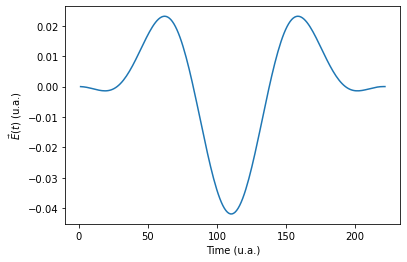

In [43]:
champ = np.genfromtxt("champ.dat")
plt.plot(champ[:,0],champ[:,1])
plt.xlabel("Time (u.a.)")
plt.ylabel(r"$\vec{E}(t)$ (u.a.)")

### Probabilité d'ionisation sur chaque canal P
Les graphiques suivant montrent la probabilité d'ionisation sur chaque canal. 

La forme est courbes est très semblable, ce que l'on observe pas dans la version PW.


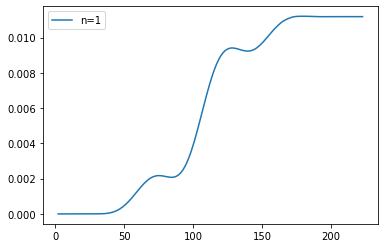

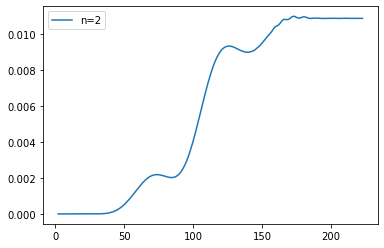

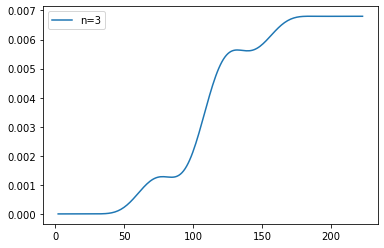

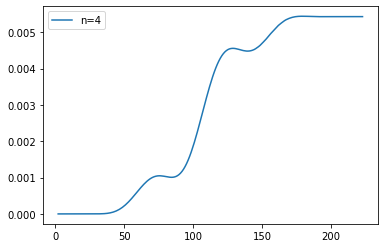

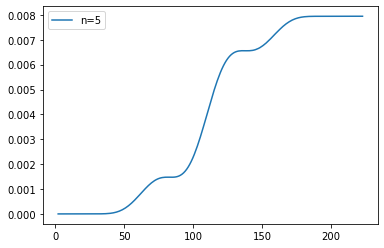

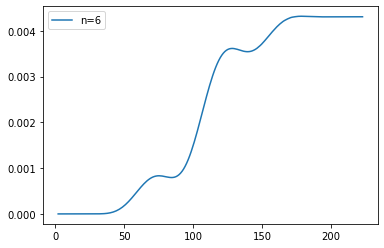

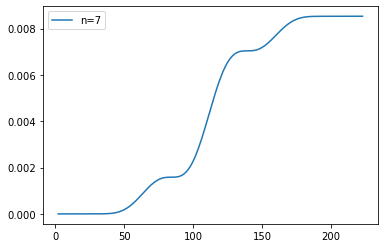

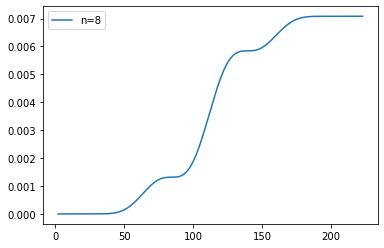

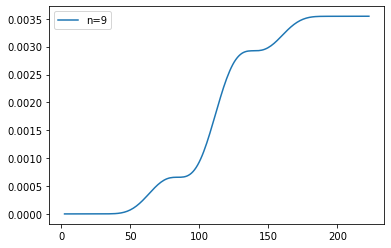

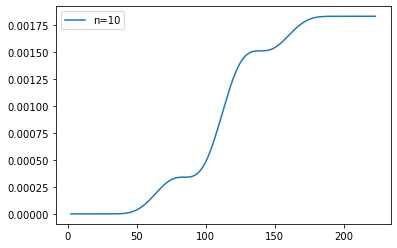

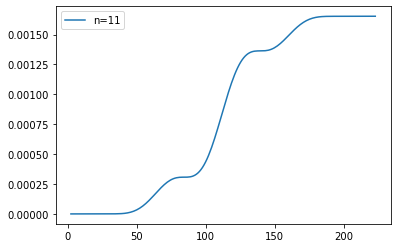

12: le fichier Proba_ionisation_canal00012.dat n existe pas


In [10]:
n = 1
datab = []
while True:
    if n<10:
        debutfichier = "Proba_ionisation_canal0000"
    elif n<100:
        debutfichier = "Proba_ionisation_canal000"
    elif n<1000:
        debutfichier = "Proba_ionisation_canal00"
    elif n<10000:
        debutfichier = "Proba_ionisation_canal0"
    if exists(debutfichier+str(n)+".dat"):
        data = np.genfromtxt(debutfichier+str(n)+".dat")
        datab.append(data)
        plt.plot(data[:,1],data[:,2],label="n="+str(n))
        plt.legend()
        plt.show()
        #plt.close()
    else:
        print(str(n)+": le fichier "+debutfichier+str(n)+".dat n existe pas")
        break
    n=n+1




### Tout sur un seul graphique

12: le fichier Proba_ionisation_canal00012.dat n existe pas


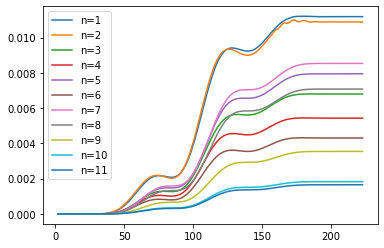

In [16]:
n = 1
datab = []
while True:
    if n<10:
        debutfichier = "Proba_ionisation_canal0000"
    elif n<100:
        debutfichier = "Proba_ionisation_canal000"
    elif n<1000:
        debutfichier = "Proba_ionisation_canal00"
    elif n<10000:
        debutfichier = "Proba_ionisation_canal0"
    if exists(debutfichier+str(n)+".dat"):
        data = np.genfromtxt(debutfichier+str(n)+".dat")
        datab.append(data)
        plt.plot(data[:,1],data[:,2],label="n="+str(n))
        plt.legend()
        #plt.show()
        #plt.close()
    else:
        print(str(n)+": le fichier "+debutfichier+str(n)+".dat n existe pas")
        break
    n=n+1
plt.show()




### Population des états liés

Dans ce calcul, il n'y a qu'un état lié. Le graphique suivant montre sa population en fonction du temps. 

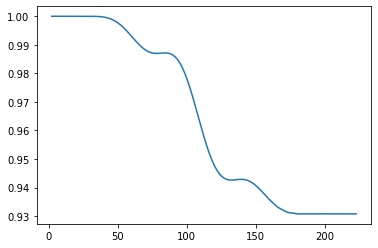

In [12]:
data = np.genfromtxt("Proba_canal_Q00001.dat")
plt.plot(data[:,1],data[:,2],label="Q="+str(n))

### Spectre de photoélectrons

Tout les spectres sont semblable ...

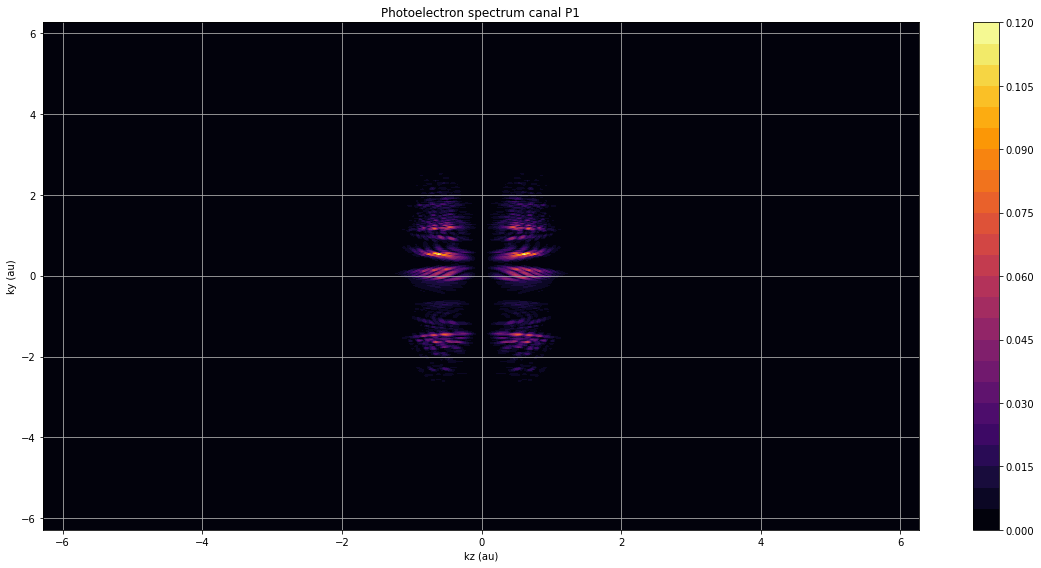

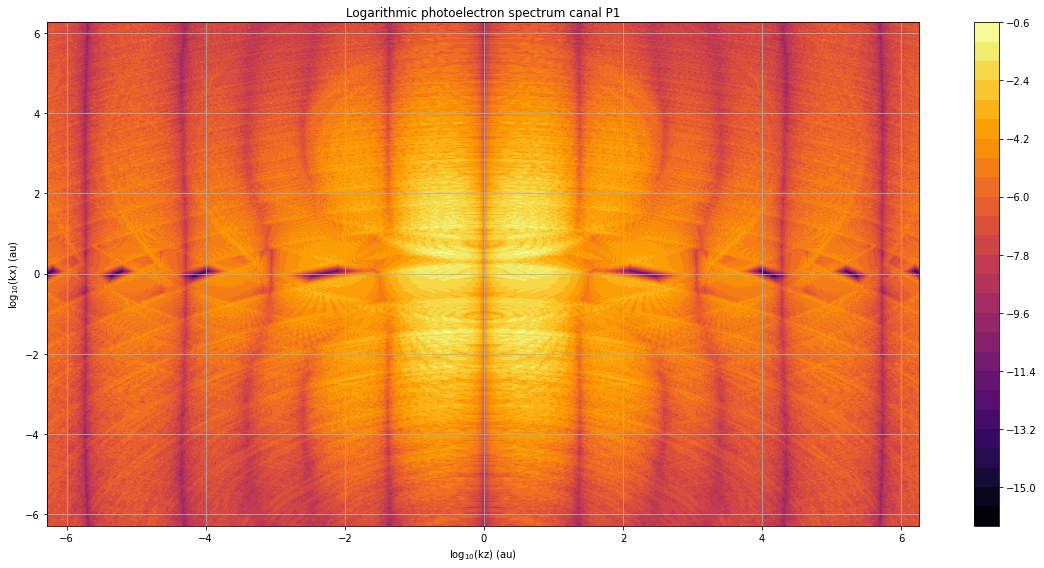

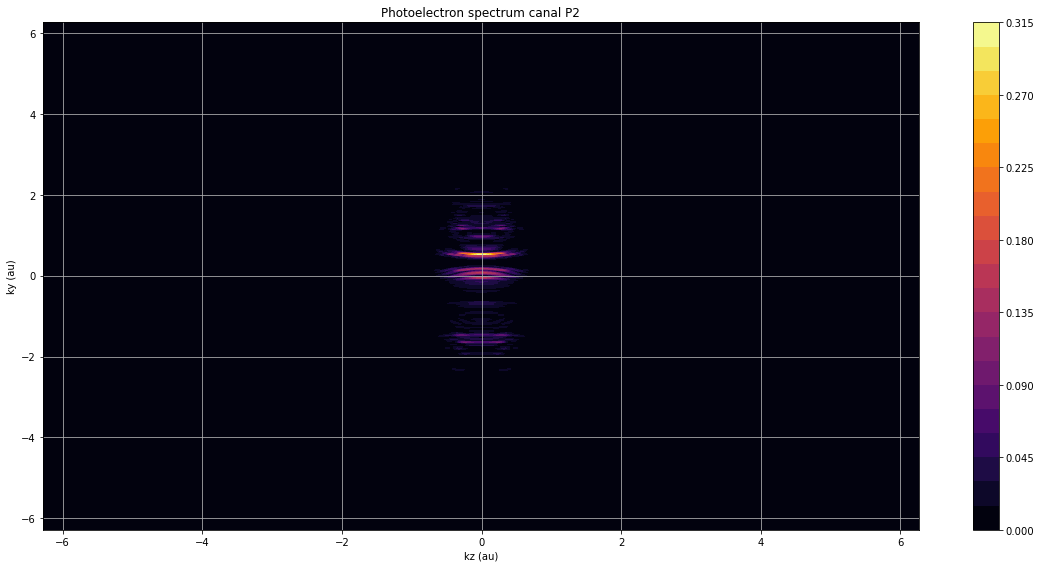

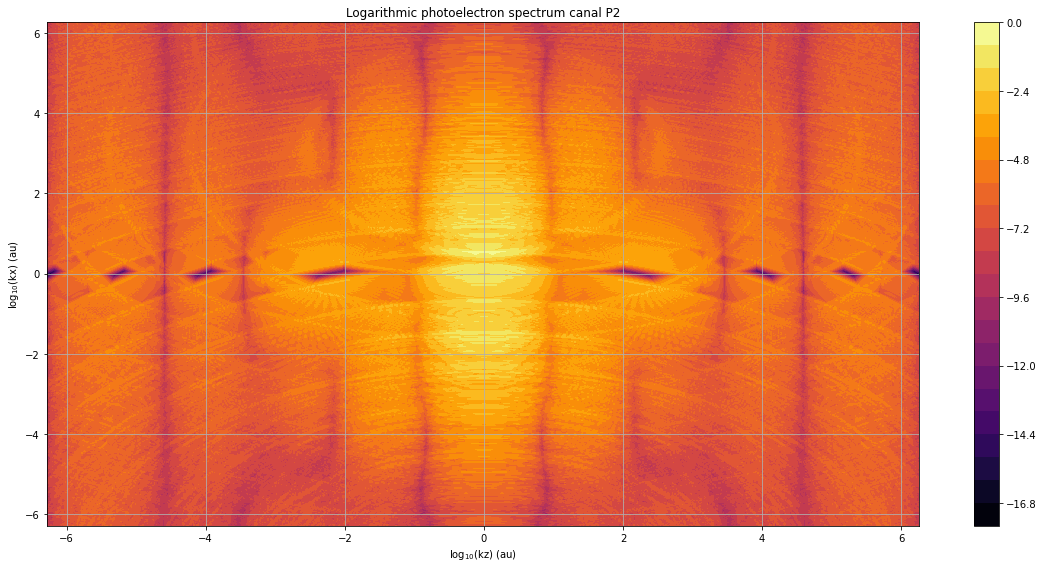

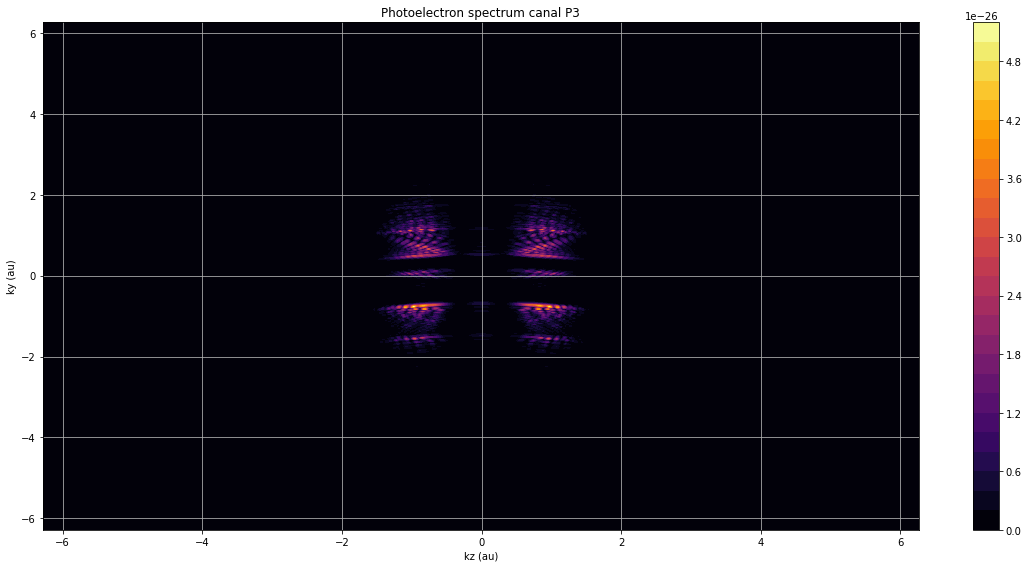

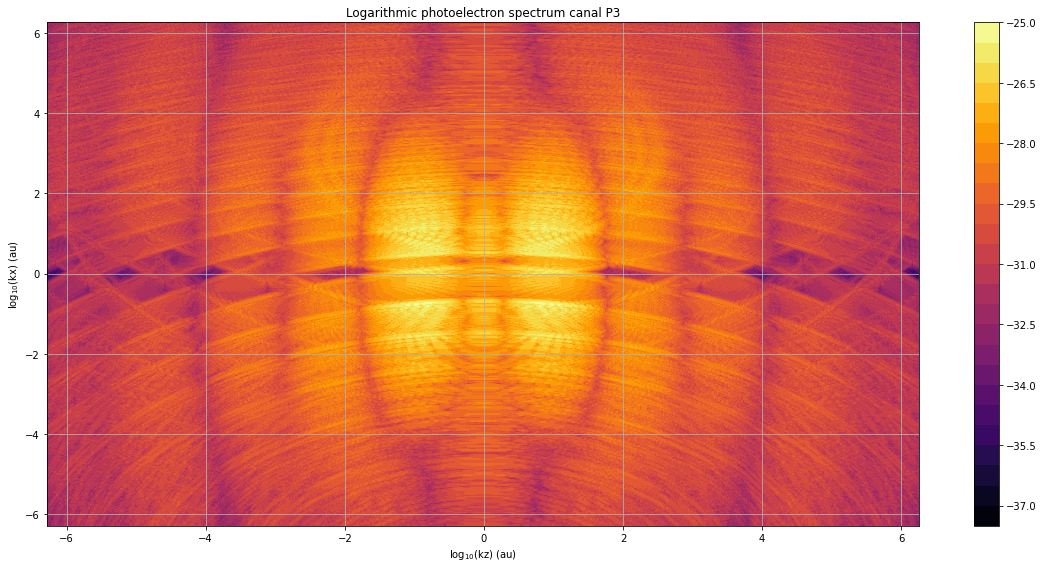

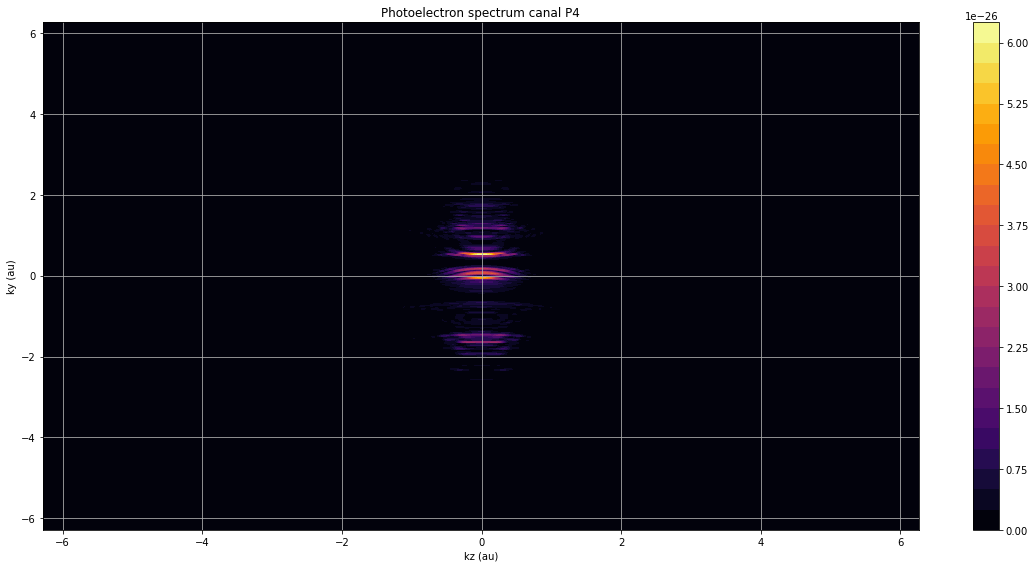

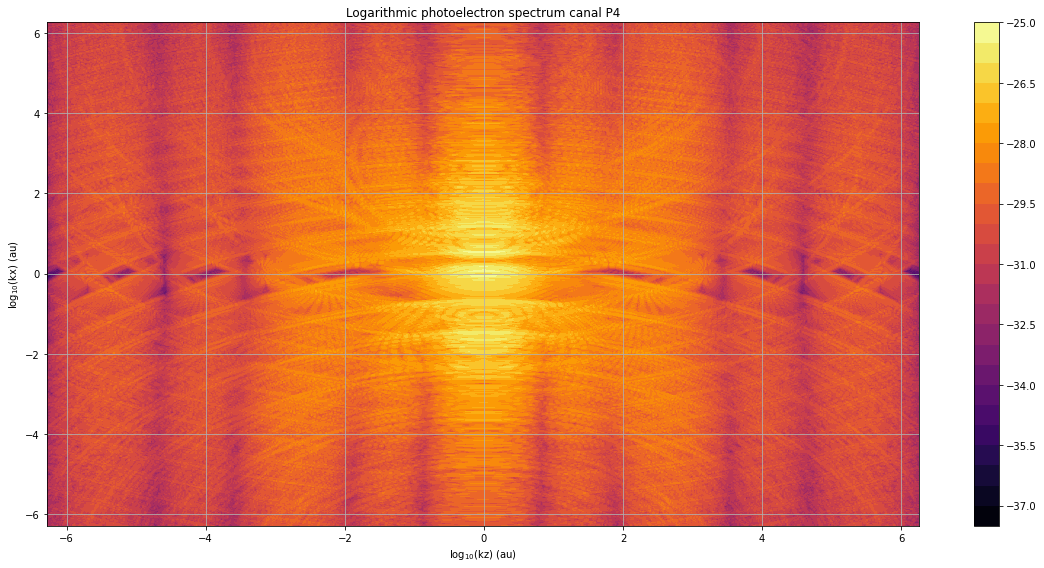

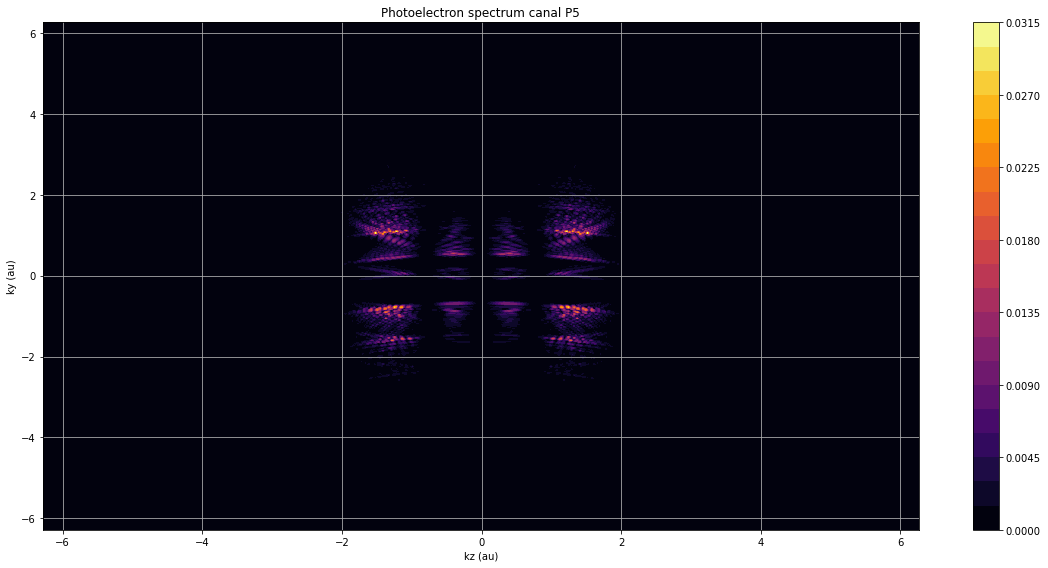

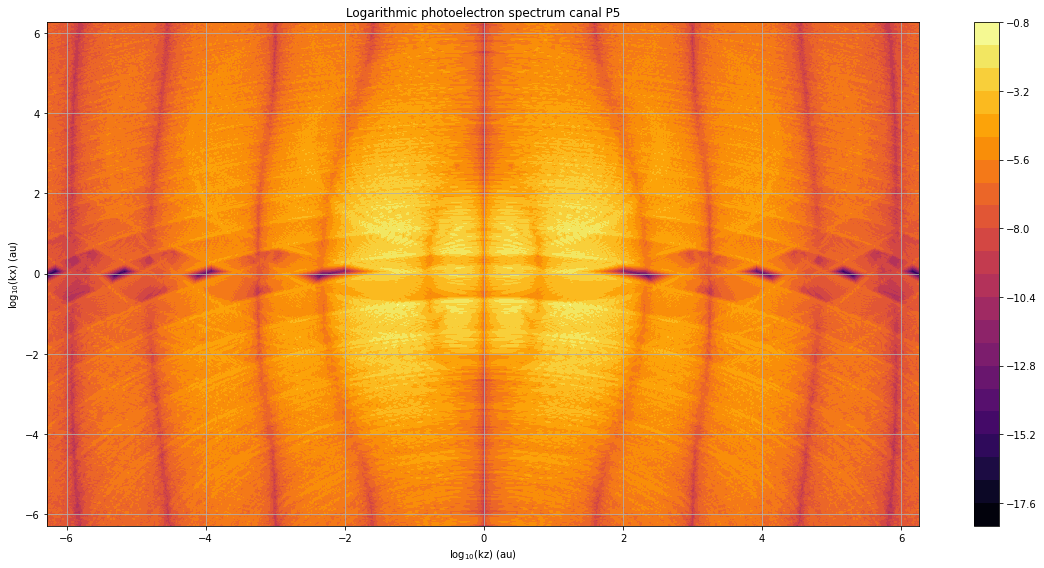

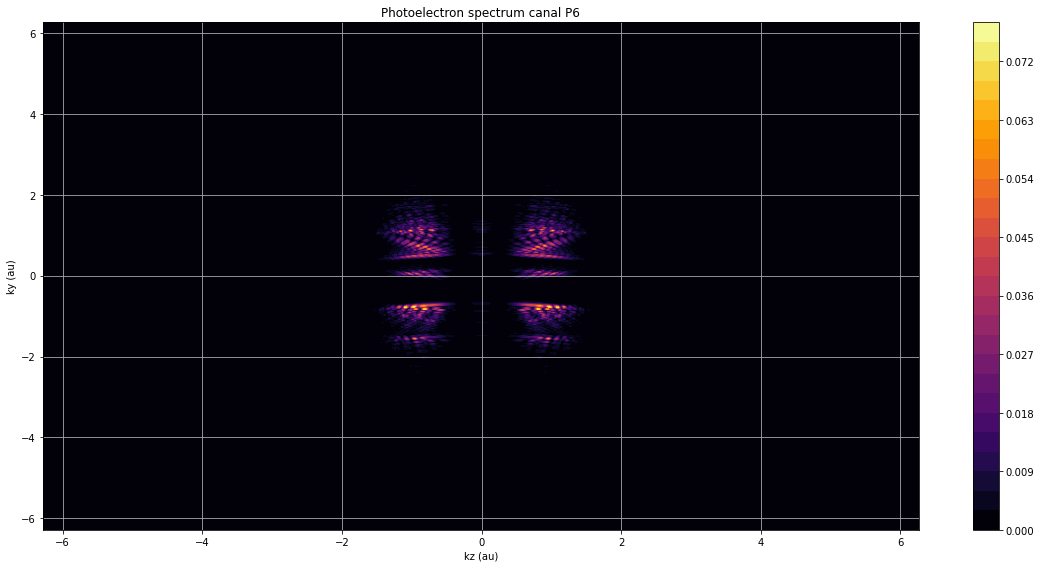

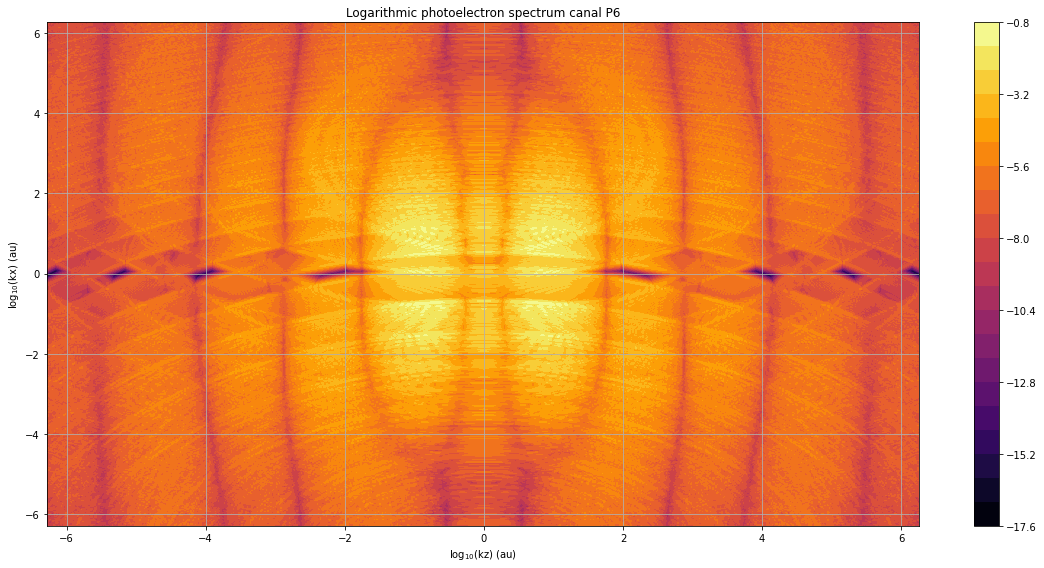

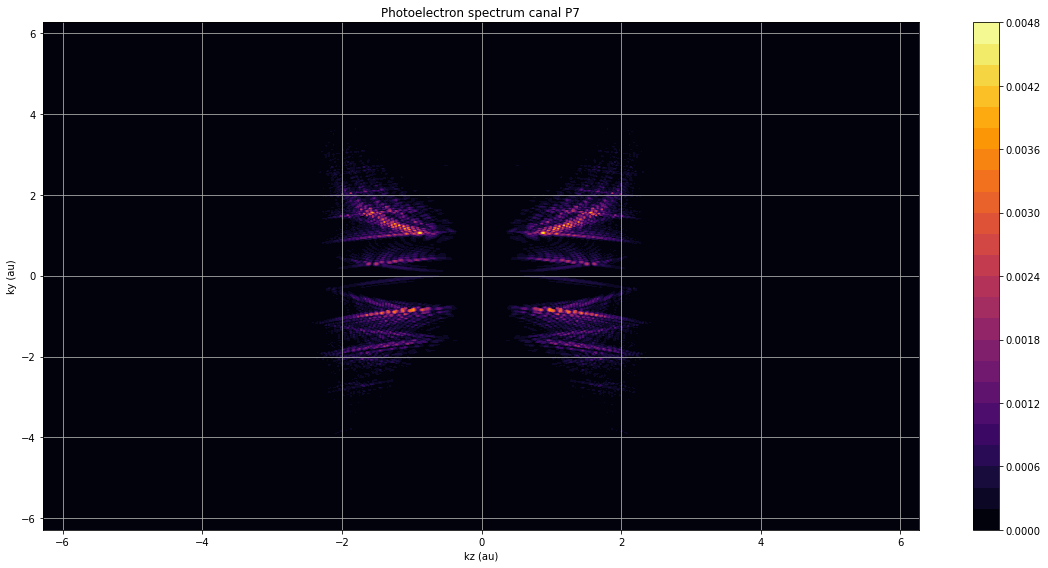

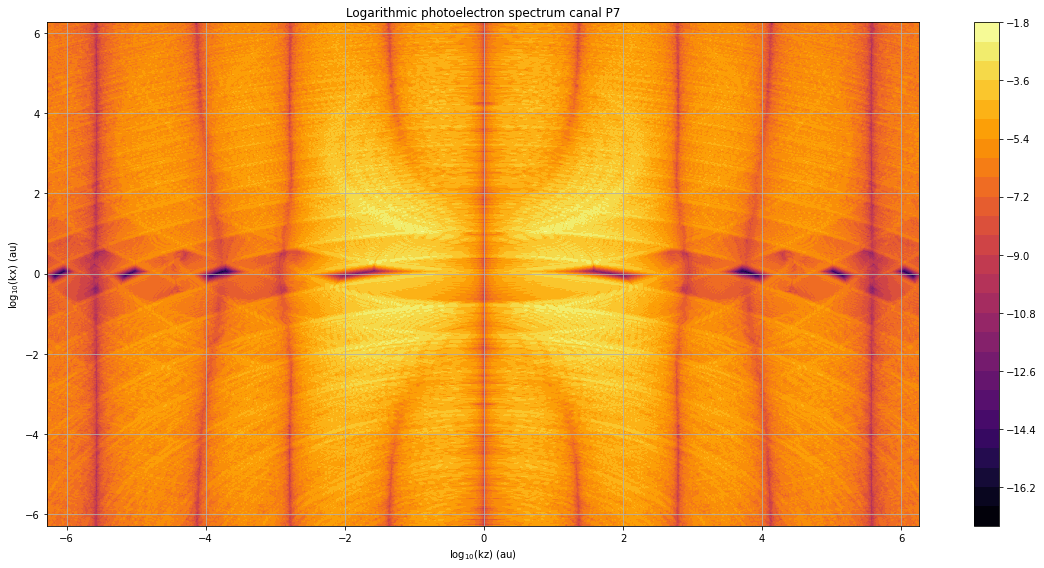

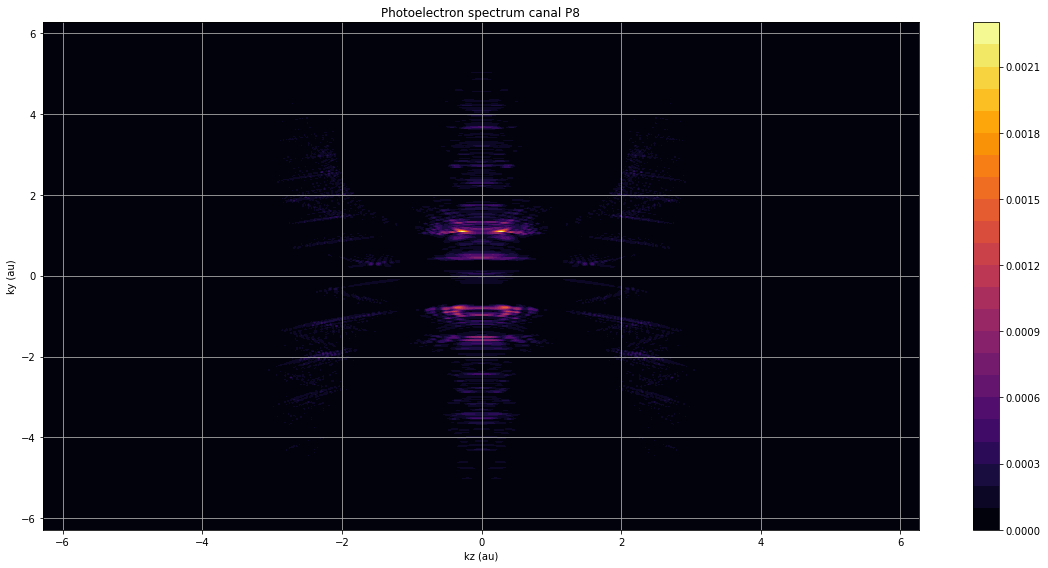

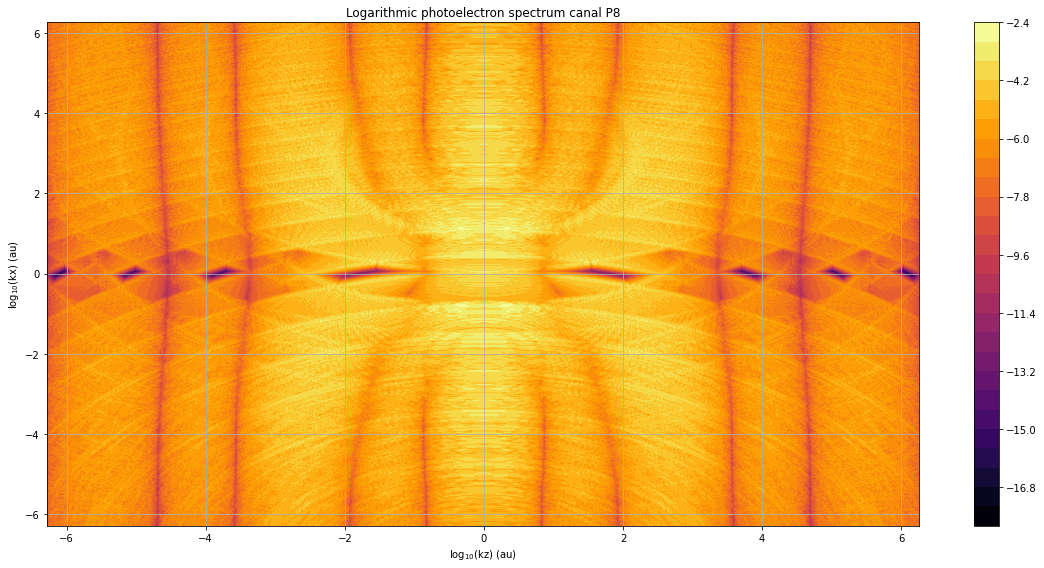

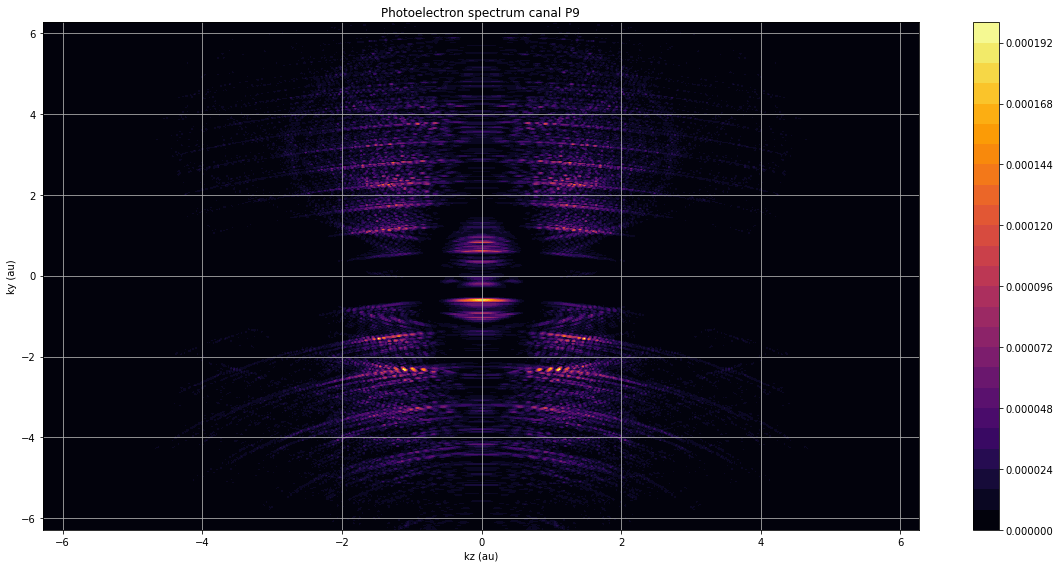

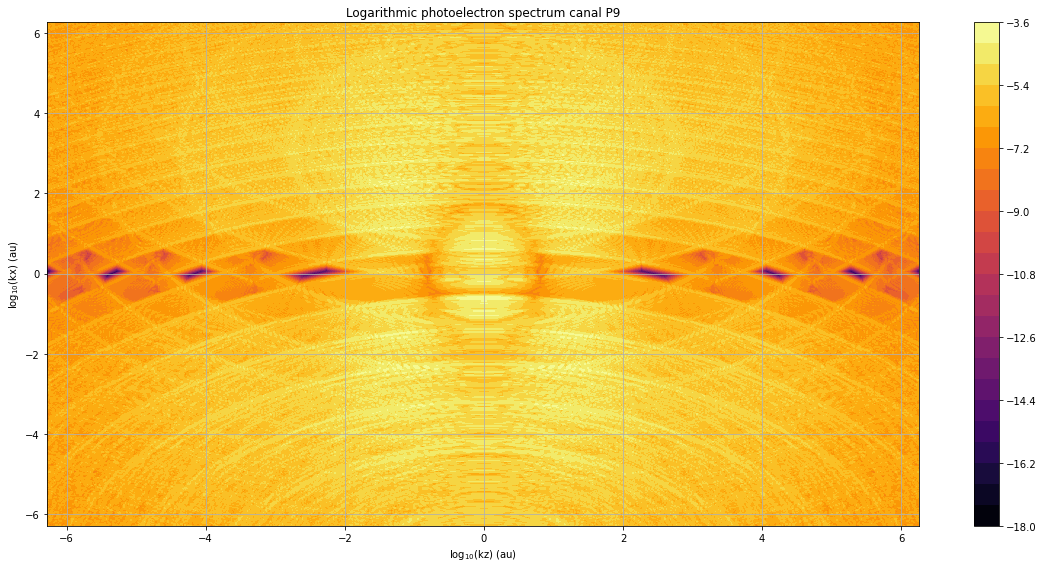

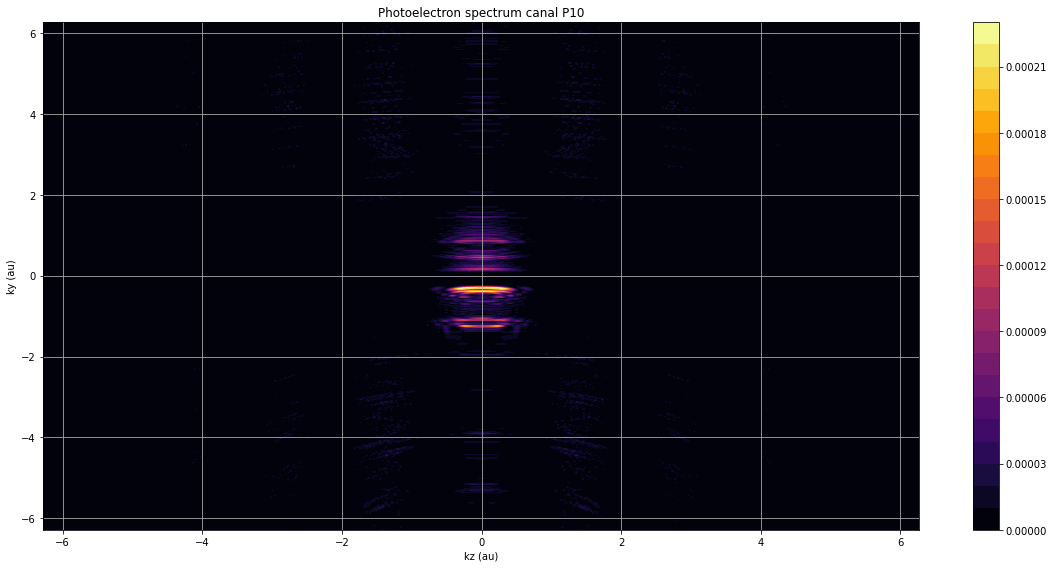

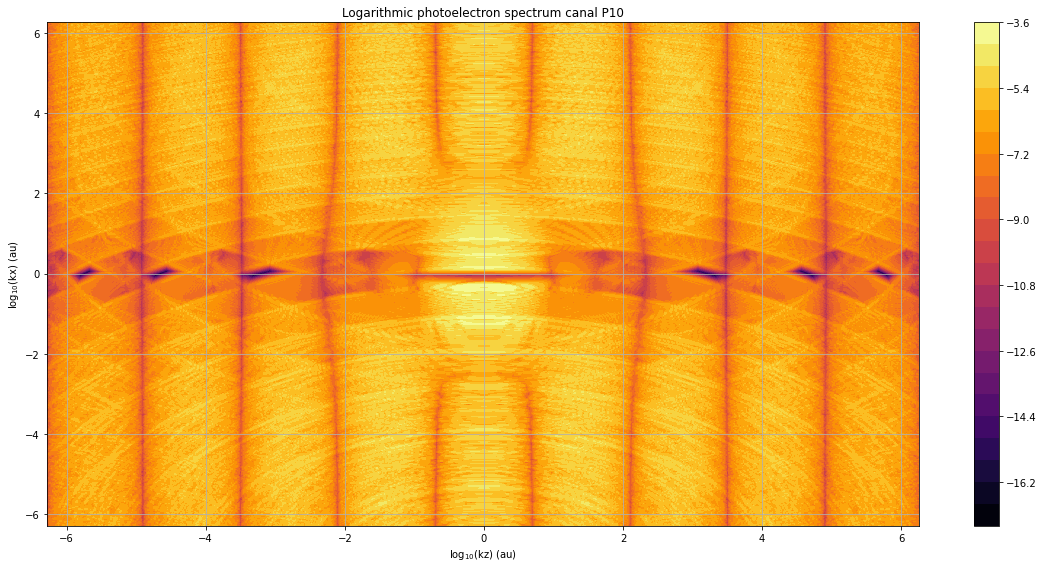

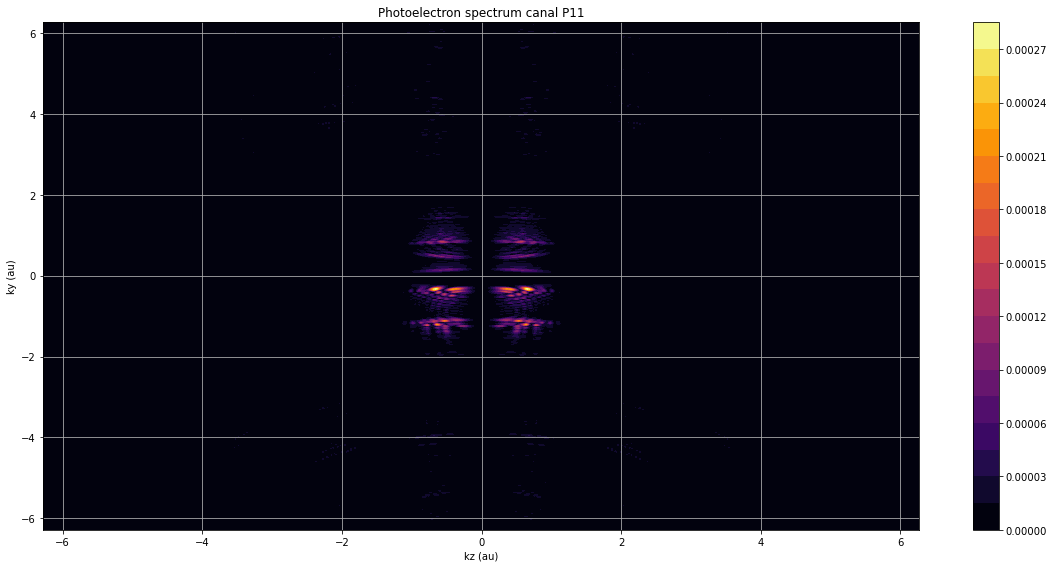

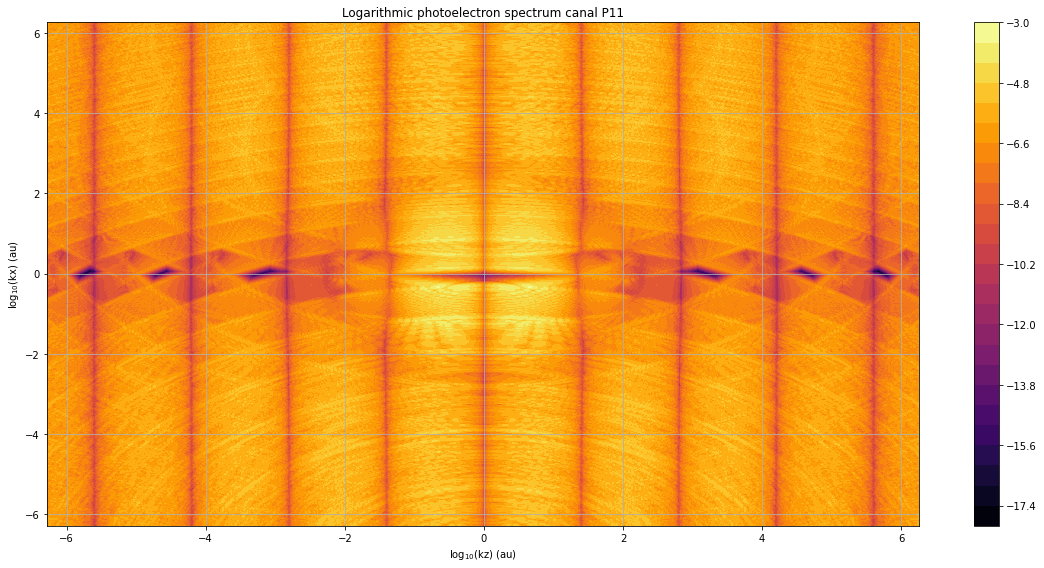

In [44]:
dimP=11
ny=601
nz=601
#READ DATA
for i in range(dimP):
    ky=[]
    kz=[]
    p=[]
    fr=open('spectre_k_canal%05d.dat'%(i+1),'r')
    lr=fr.readlines()
    fr.close()
    it=0
    for j in range(ny):
        p_t=[]
        for k in range(nz):
            if(k==0):
                #ky.append(np.float64(lr[it][13:26]))
                ky.append(np.float64(lr[it][0:12]))
            if(j==0):
                kz.append(np.float64(lr[it][26:39]))
            if(lr[it][62]=='E'):
                p_t.append(np.float64(lr[it][39:66]))
            else:
                p_t.append(0.E0)
            it=it+1
        p.append(p_t)
    ky=np.array(ky)
    kz=np.array(kz)
    p=np.array(p)
    #MAKE LINEAR FIGURES
    plt.figure(figsize=(16,8))
    plt.contourf(kz,ky,p,levels=25,cmap='inferno')
    plt.colorbar()
    plt.grid()
    plt.title('Photoelectron spectrum canal P%d'%(i+1))
    plt.xlabel('kz (au)')
    plt.ylabel('ky (au)')
    plt.tight_layout()
    plt.savefig('spec_P%05d.png'%(i+1))
    plt.show()
    plt.close()
    #MAKE LOGARITHMIC FIGURES
    plt.figure(figsize=(16,8))
    plt.contourf(kz,ky,np.log10(p),levels=25,cmap='inferno')
    plt.colorbar()
    plt.grid()
    plt.title('Logarithmic photoelectron spectrum canal P%d'%(i+1))
    plt.xlabel(r'$\log_{10}$(kz) (au)')
    plt.ylabel(r'$\log_{10}$(kx) (au)')
    plt.tight_layout()
    plt.savefig('spec_log_P%05d.png'%(i+1))
    plt.show()
    plt.close()
#print(p)
#print(ky)

### Test de lecture

J'ai effectuer un petit test de lecture pour voir si la méthode utilisé est efficace comparé avec genfromtxt de numpy. Cette méthode est efficace et prend 0.5 seconde pour lire un fichier de spectre comparé a 1.14 seconde pour genfromtxt

In [27]:
import time
time1 = time.time()
dimP=2
ny=601
nz=601
#READ DATA
for i in range(dimP):
    ky=[]
    kz=[]
    p=[]
    fr=open('spectre_k_canal00001.dat','r')
    lr=fr.readlines()
    fr.close()
    it=0
    for j in range(ny):
        p_t=[]
        for k in range(nz):
            if(k==0):
                ky.append(np.float64(lr[it][13:26]))
            if(j==0):
                kz.append(np.float64(lr[it][26:39]))
            if(lr[it][62]=='E'):
                p_t.append(np.float64(lr[it][39:66]))
            else:
                p_t.append(0.E0)
            it=it+1
        p.append(p_t)
time2 = time.time()
print(str(time2-time1)+" sec")

0.5025341510772705 sec


In [28]:
import time
time1 = time.time()
data = np.genfromtxt('spectre_k_canal00001.dat')
time2 = time.time()
print(str(time2-time1)+" sec")

1.1407716274261475 sec
